<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/final_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : </b>
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? 

In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import folium
from folium import plugins

%matplotlib inline

In [3]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (15, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [4]:
# Mounting the goole drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset

path = '/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv'

airbnb_df = pd.read_csv(path)

In [6]:
# Displaying first five rows of the dataset

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
# Displaying last five rows of the dataset

airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
# Checking the size of the dataset

airbnb_df.shape

(48895, 16)

 **We Have 48895 rows and 16 features.** 

In [9]:
#  Displaying more information about the airbnb dataframe --> Column name, Null values and Dtypes

airbnb_df.info( ) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**We have both numerical and cataorial attributes.**

**name and host have very less null values, so we will delete rows containing null value.**

**reviews_per_month and last_review have large number of null value.**

In [10]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [11]:
# Dropping the rows having Nan values in "name" and "host_name" column

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)

In [12]:
# Extracting the index of null values rows in "reviews_per_month", "last_review" columns

null_value_index = np.where(airbnb_df[["reviews_per_month", "last_review"]].isnull())[0]
print('number of rows containing null values  ',len(null_value_index))
print('number of rows containing null values  ',len(null_value_index)*100/len(airbnb_df))


number of rows containing null values   20074
number of rows containing null values   41.08641368864874


**As we can see we can not delete whole rows containing null values.**

In [13]:
# Filling Nan values in "reviews_per_month" with 0.0

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)

In [14]:
# Converting the data type of "last_review" column to datetime object

airbnb_df["last_review"] = airbnb_df["last_review"].astype("datetime64")

**Extracting Year and Month from "last_review" column.**

In [15]:
# Extracting year and month from the "last_review" column

airbnb_df["last_review_month"] = airbnb_df["last_review"].apply(lambda row: row.month)
airbnb_df["last_review_year"] = airbnb_df["last_review"].apply(lambda row: row.year)

In [16]:
# Checking the dtypes of "last_review_month" and "last_review_year" columns

month_year_cols = ["last_review_month", "last_review_year"]
airbnb_df[month_year_cols].dtypes

last_review_month    float64
last_review_year     float64
dtype: object

In [17]:
# Converting the dtypes of "last_review_month" and "last_review_year" into integer

airbnb_df[month_year_cols] = airbnb_df[month_year_cols].astype("Int64")                       # Int64 represents nullable int

In [18]:
# Dropping "last_review" column

airbnb_df.drop(labels = "last_review", axis = 1, inplace = True)

**After extracting information about year and month, We can delete column.**

In [19]:
# airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 80, 150, 1000], include_lowest = True, labels = ["low", "mid", "high"])

In [20]:
# Displaying the basics statistics of the numerical data

col_to_check = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
airbnb_df[col_to_check].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.00,48858.00,48858.00,48858.00,48858.00,48858.00
mean,152.74,7.01,23.27,1.09,7.15,112.80
std,240.23,20.02,44.55,1.60,32.96,131.61
min,0.00,1.00,0.00,0.00,1.00,0.00
25%,69.00,1.00,1.00,0.04,1.00,0.00
50%,106.00,3.00,5.00,0.37,1.00,45.00
75%,175.00,5.00,24.00,1.58,2.00,227.00
max,10000.00,1250.00,629.00,58.50,327.00,365.00


**We can see** 

  * **Minimum pricing per night is 0, but on airbnb webiste it's $10.**
  
  * **There are many outliers.** 

In [21]:
# Capping the min price to 10 usd

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

**Using Domain knowledge and [google search](https://www.airbnb.co.in/help/article/1233/longterm-pricing?locale=en&_set_bev_on_new_domain=1651572441_ZjU0ZTIzMTE5NzQw), we will **change minimum price to $10.**  

In [22]:
# Displaying the basics statistics of the object data

airbnb_df.describe(include = 'O').round(2) 

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48858,48858,48858,48858,48858
unique,47884,11450,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21643,3917,25393


**We can we see**
  * **many host_name have multiple listings.**
  * **there are 5 unique neighbourhood_group.**
  * **there are 221 unique neighbourhood.**
  * **there are 3 different room_type.**


In [23]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

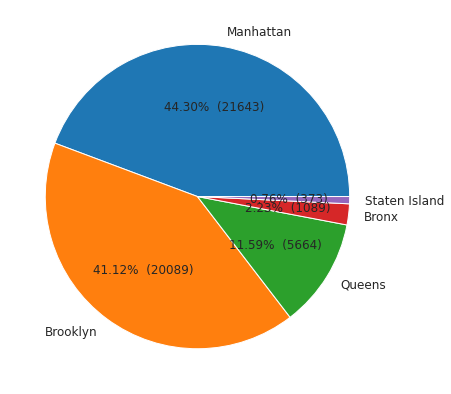

In [24]:
# Number of listings present in each borough

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

 
data = airbnb_df["neighbourhood_group"].value_counts()
labels = airbnb_df["neighbourhood_group"].value_counts().index

#create pie chart
plt.pie(data, labels = labels ,autopct=make_autopct(data)) # autopct='%.0f%%' )
plt.show()

**We can see**
  * **Manhattan have highest listings and staten island have lowest.**
  * **Manattan and Brooklyn listings constitute 85% of total listings.**



In [25]:
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

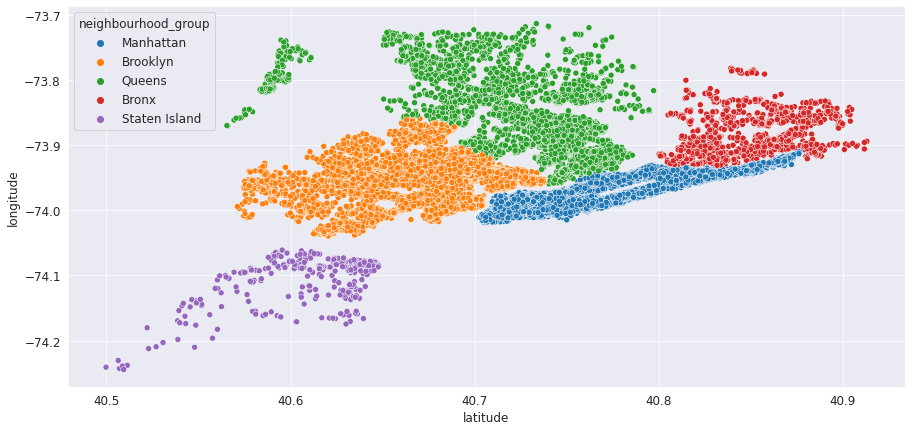

In [26]:
#visulaization of ncy neighbourhood_group

hue_order = [ 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
sns.scatterplot(x = "latitude",y = "longitude", hue = 'neighbourhood_group', hue_order = hue_order, data = airbnb_df)

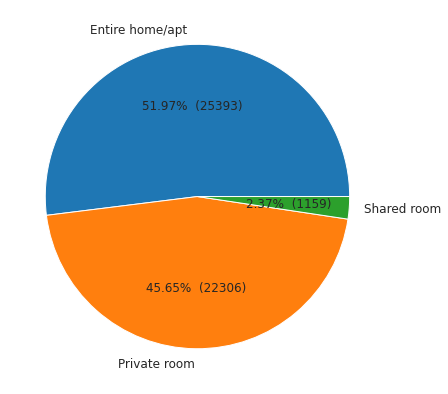

In [27]:
# Type of room space airbnb host provides
 
data = airbnb_df["room_type"].value_counts()
labels = airbnb_df["room_type"].value_counts().index

#create pie chart
plt.pie(data, labels = labels ,autopct=make_autopct(data)) # autopct='%.0f%%' )
plt.show()

**We can see 51.97% people like to list Entire home/apt, 45.6% list Private room and very less 2.37% list Shared room.** 

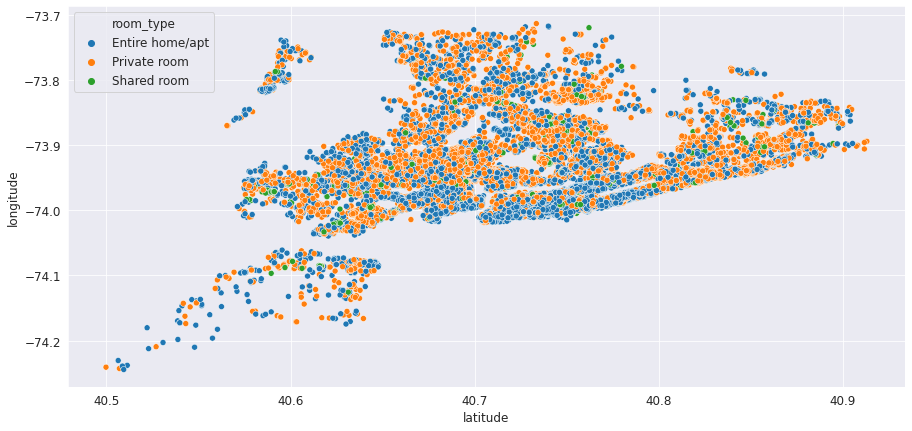

In [28]:
# Visualisation of NYC wrt room type
hue_order = ['Entire home/apt', 'Private room', 'Shared room']
sns.scatterplot(x = "latitude", y = "longitude", hue = "room_type" , hue_order = hue_order, data = airbnb_df);

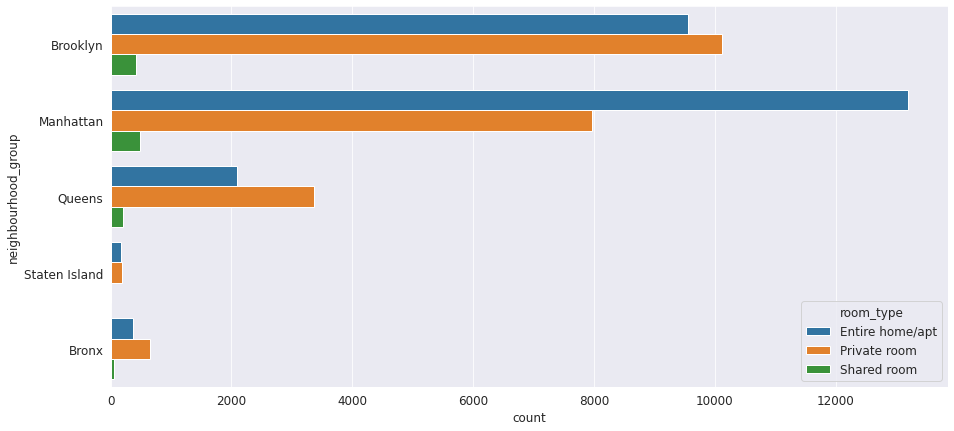

In [100]:
# Type of room space airbnb host provides in each borough

sns.countplot(y = airbnb_df.neighbourhood_group, hue = airbnb_df["room_type"], hue_order = ['Entire home/apt', 'Private room', 'Shared room']
, orient = 'h' )

**We can see**
  * **Manattan have different pattern then other groups, here Entire rooms have 
  more listing then then pvt room and shared room.**
  * **Staten Island have nil shared room and least room.Since it is very far from buisness area.**

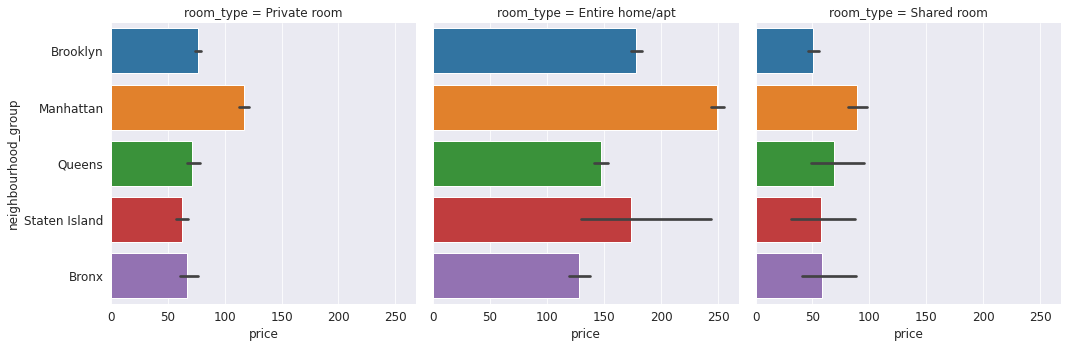

In [102]:
#price vs neighbourhood group of each room type

sns.catplot(y = "neighbourhood_group", x = "price", col = "room_type", kind = "bar", data = airbnb_df) 

 **We can see that**
  * **Entire room type are most expensive, followed by Private room and lastly less expensive shared rooms.**
  * **Manattan is most expensive in all room type.**
  * **Queen is second expensive in shared room type.**
  * **Brooklyn is second expensive in Entire and Private room type.**
   

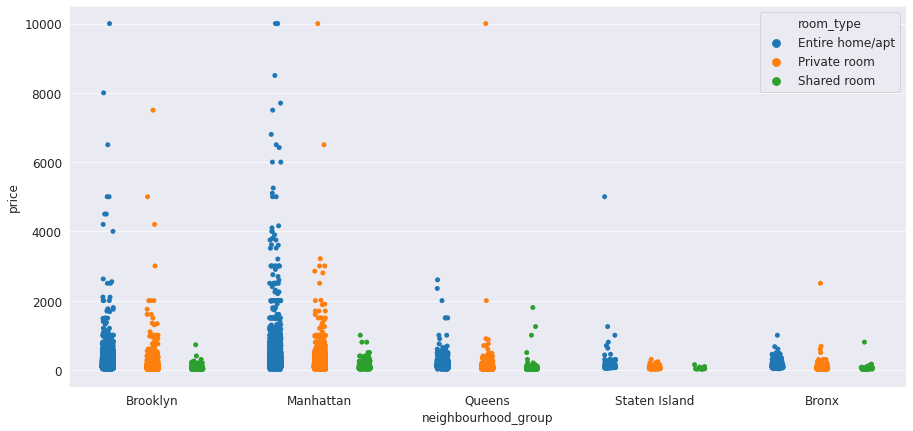

In [103]:
# price vs borough

sns.stripplot(x = "neighbourhood_group", y = "price", hue = "room_type", dodge = True, hue_order = ['Entire home/apt', 'Private room', 'Shared room']
, data = airbnb_df)

**We can see** 
  * **Manattan and Brookyn have most outliers.**
  * **Private room have most outliers.**

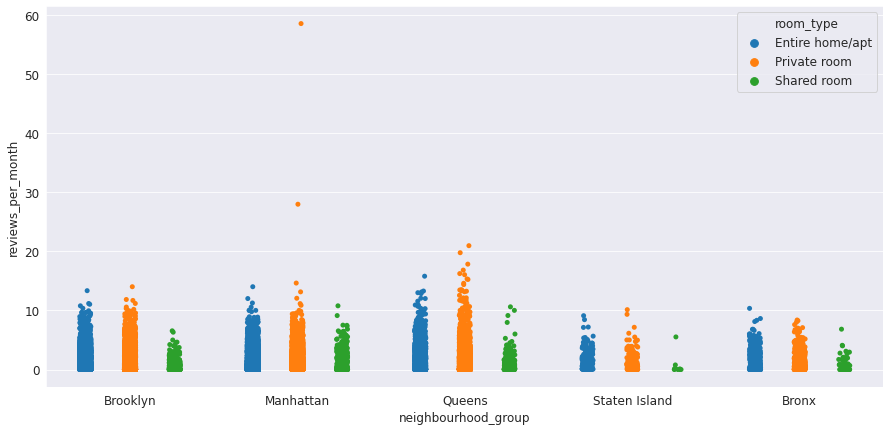

In [104]:
# Broughs vs review_per_month

sns.stripplot(x = "neighbourhood_group", y = "reviews_per_month", hue = "room_type", hue_order = ['Entire home/apt', 'Private room', 'Shared room']
,dodge = True, data = airbnb_df)

**We can see that**
  * **Queens have most review per month for every room type.**
  * **Private room have highest outliers.**
   

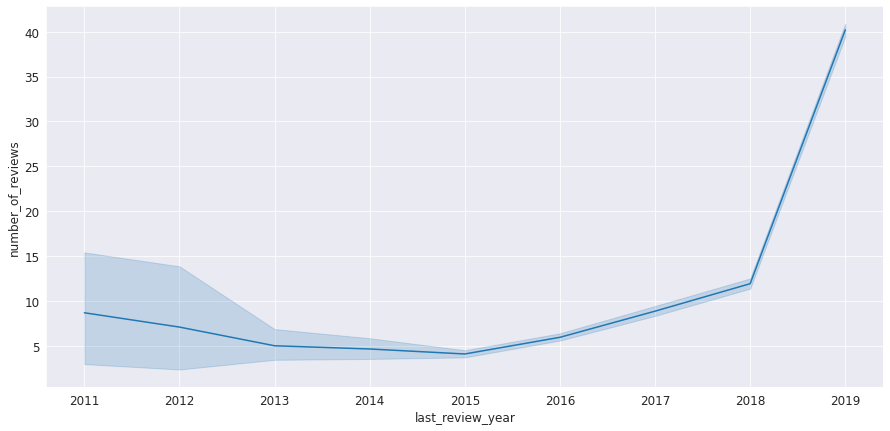

In [33]:
last_review_year = airbnb_df[~airbnb_df["last_review_year"].isna()]

sns.lineplot(x = "last_review_year", y = "number_of_reviews", data = last_review_year, err_style = 'band' ) 

**We can see** 
  * **there is a sharp increase in number of reviews at 2015 and 2018.**
  * **there is decrese from 2011 to 2015.** 
 

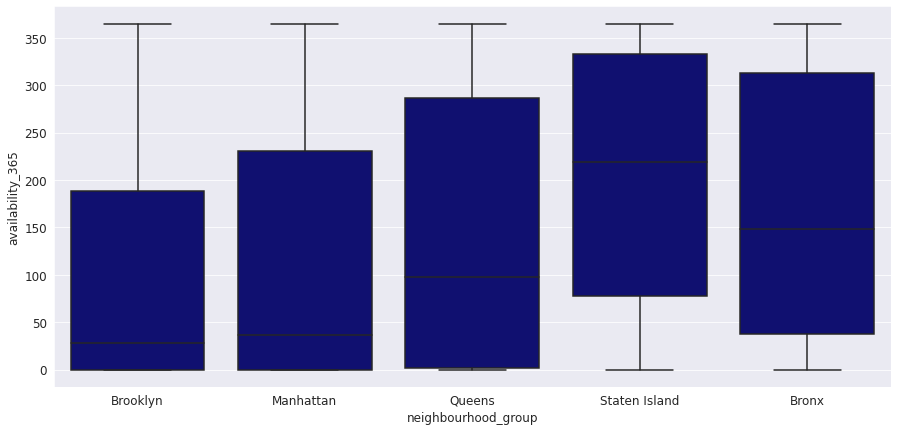

In [99]:
# availability of listings in neighbourhood_group

sns.boxplot(x = "neighbourhood_group", y = "availability_365", color = "navy", data = airbnb_df)

**We can see**
  * **brooklyn is most busiest followed by Manhattan**
  * **Staten Island is least busiest.**
 

> **Let's know about Busiest host**

In [35]:
#  host having highest listings_count  

host_listings_count_max = airbnb_df["calculated_host_listings_count"].max()
busiest_host_name = airbnb_df.loc[airbnb_df["calculated_host_listings_count"] == host_listings_count_max, "host_name"].values[0]
busiest_host_name 

'Sonder (NYC)'

In [36]:
# Closer look at Busiest Host listings

busiest_host_df = airbnb_df[airbnb_df["host_name"] == busiest_host_name]
busiest_host_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309,<NA>,<NA>,high
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219,5,2019,high


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


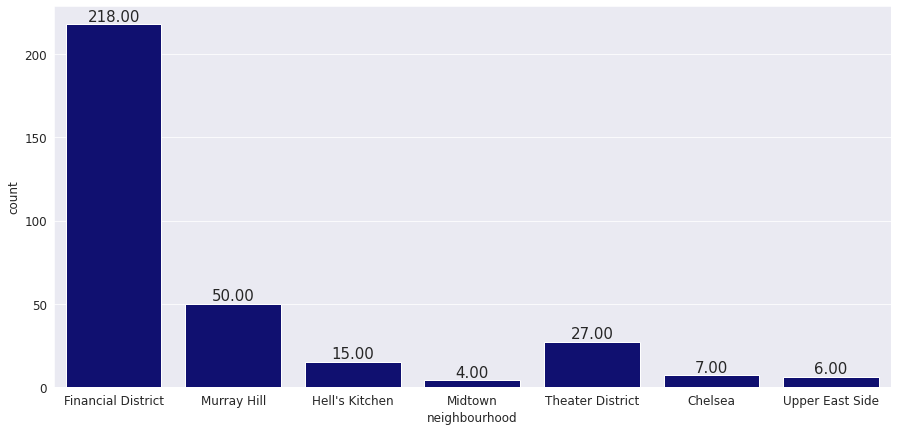

In [96]:
# Listings in different neighbourhood by Busiest Host
plots = sns.countplot(busiest_host_df["neighbourhood"], color = "navy")
#to annot 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

**We can see that**

  * **Sonder have all listings in Manhattan.**
  * **Financial District have most rooms.**
 

In [38]:
# Highly reviewed listing of the busiest host

busiest_host_max_reviews = busiest_host_df["number_of_reviews"].max()
busiest_host_df[busiest_host_df["number_of_reviews"] == busiest_host_max_reviews]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
41426,32238307,Sonder | Stock Exchange | Classic Studio + Lau...,219517861,Sonder (NYC),Manhattan,Financial District,40.70574,-74.01023,Entire home/apt,201,2,20,4.11,327,333,6,2019,high


In [39]:
# price of the busiest host listing

print('max price per night in Sonder listings     ', busiest_host_df["price"].max())
print('median price per night in Sonder listings  ', busiest_host_df["price"].median())
print('min price per night in Sonder listings     ', busiest_host_df["price"].min())

max price per night in Sonder listings      699
median price per night in Sonder listings   228.0
min price per night in Sonder listings      100


In [40]:
# Type of room space busiest host deals in

busiest_host_df["room_type"].value_counts() 

Entire home/apt    319
Private room         8
Name: room_type, dtype: int64

**Entire room constitute  97.5% of sonders listing** 

> **Room type** 

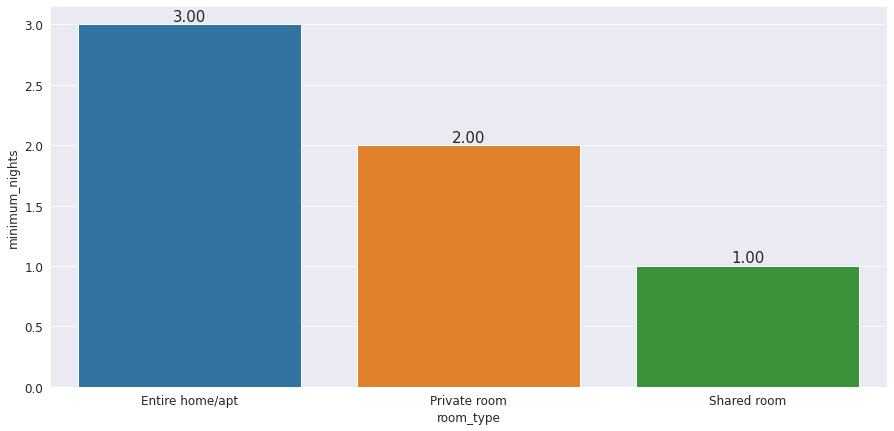

In [105]:
#ploting a histogram between room_type and avg nights spend 

room_nights=airbnb_df.groupby('room_type')['minimum_nights'].median().reset_index()
plots = sns.barplot(x='room_type',y='minimum_nights',data=room_nights, hue_order = ['Entire home/apt', 'Private room', 'Shared room']
)
#to annot
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

**Entire home have highest median nights spend.**

**Shared room have lowest median nights spend.**

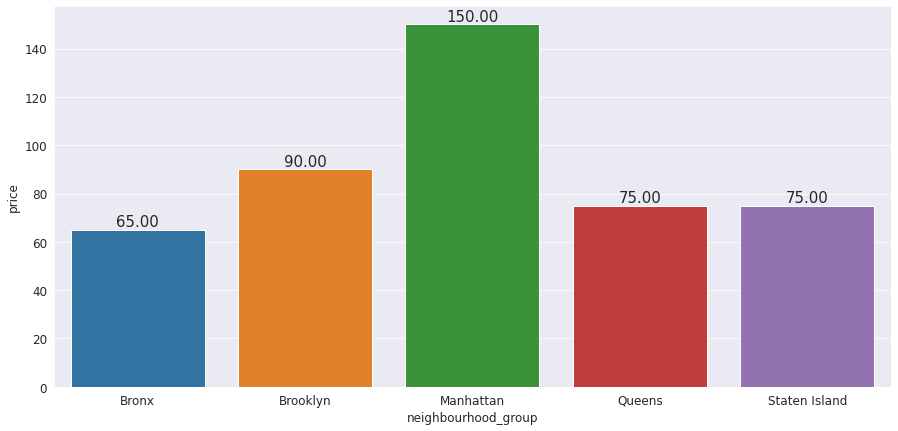

In [95]:
#minimum_nights according to each borough

borough_nights=airbnb_df.groupby('neighbourhood_group')['price'].median().reset_index()

plots = sns.barplot(y='price', x='neighbourhood_group',data=borough_nights)
#to annot
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

**Manhattan is most expensive while Bronx is least expensive.**

**Queen and Staten Island are equally have same price.**

> **Lets explore Manhattan Borough**

In [43]:
#creating dataframe of manhattan 

Manhattan_df = airbnb_df[airbnb_df["neighbourhood_group"] == 'Manhattan' ]
Manhattan_df.head(1) 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5,2019,high


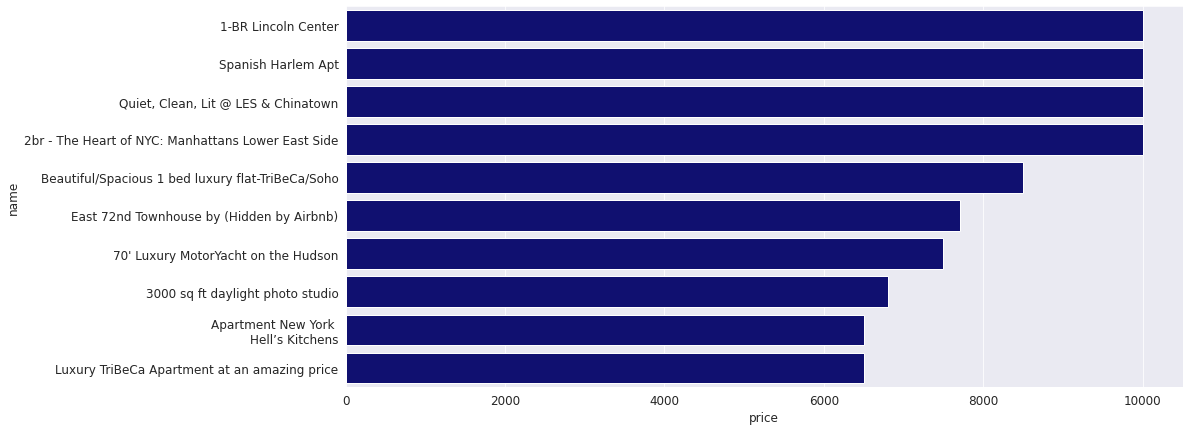

In [92]:
#top 10 expensive neighbourhood and hotel in Manhattan 

data = Manhattan_df.nlargest(10,'price')[['name','price']]
sns.barplot(y = 'name', x = 'price', data = data, color = "navy")

**Here are we can see $10000 is maximum price share by 4 properties.**

In [70]:
#avg rent price of manhattan
Manhattan_df.price.median()

150.0

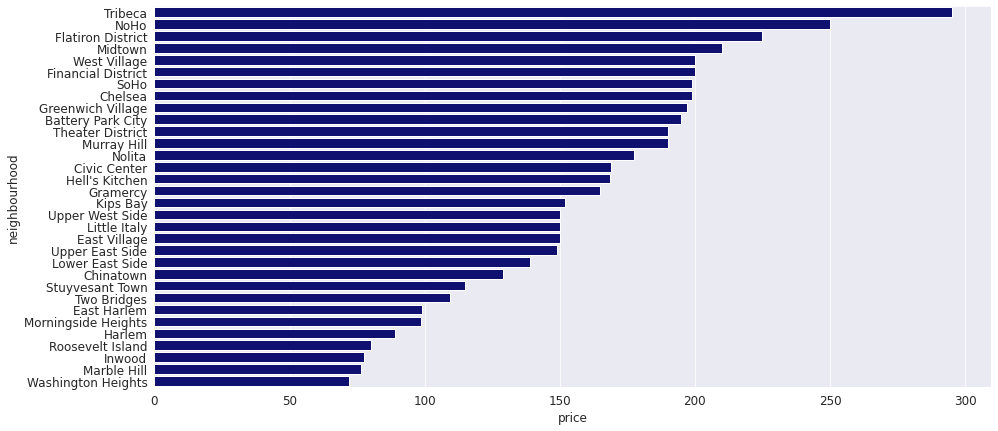

In [93]:
#avg price in each neighbourhood

Manhattan_neighbourhood_price=Manhattan_df.groupby('neighbourhood')["price"].median().sort_values(ascending=False).reset_index() 
sns.barplot(x = 'price',y = 'neighbourhood', data = Manhattan_neighbourhood_price, color = "navy")

**Tribeca, noho, and Flairon Districts have high rent.**

**There are many nieghbour where rent is higher then median $150.** 

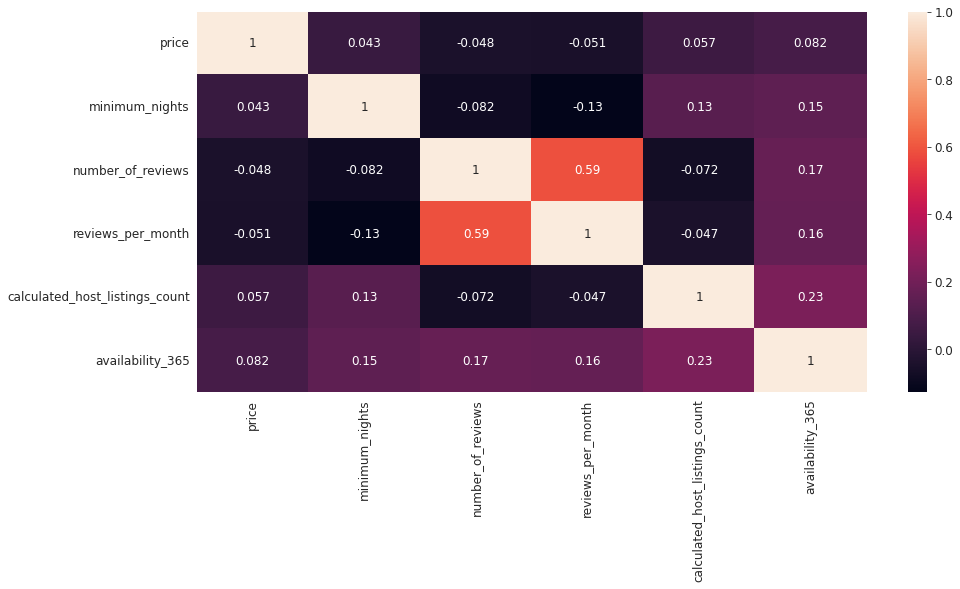

In [ ]:
# Correlation matrix

corr = airbnb_df[col_to_check].corr()
sns.heatmap(corr, annot=True)

**No columns are highly correlated.**



# **Inferences and Conclusions**

**We have drawn many interesting inferences from the dataset, here's a summary 
of few of them:**


* **Manhattan and Brooklyn are the most crowded boroughs of New York City as compared to Staten Island, Queens and Bronx so increasing the number of hosts  in Manhattan and Brooklyn will help in generating more revenue.**

* **Manhattan’s listings are most expensive so offering special discounts in the peak season might help in attracting more customers.**

* **Optimising the price of listings in other boroughs using our analysis also helps in increasing the business.**

* **Customers prefer to stay in Entire home/apt or private room types as compared to shared room types so Airbnb should strategize on making more entire and private rooms available.**

* **By pushing the popular (most reviewed) hosts listings forward Airbnb can increase its user’s experience.**

* **Ask for suggestions from most reviewed hosts and as well as from customers to enhance their experience.**

* **Advertising more about the famous sites in Queens, Bronx and Staten Island to tourists can boost revenue in these regions as well.**


